In [6]:
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')

C:\Users\SWARUP


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('New Dataset 5000.csv')
TempData.head(30)

StationId         Datetime  PM2.5   PM10    NO    NO2    NOx    NH3    CO  \
0      TG002   5/14/2018 0:00  35.25  88.50  2.12  33.10  19.30  14.10  0.96   
1      TG002   5/14/2018 1:00  32.00  73.50  2.17  20.30  12.60  13.80  0.17   
2      TG002   5/14/2018 2:00  20.50  58.00  3.00  17.35  11.65  13.48  1.53   
3      TG002   5/14/2018 3:00  21.00  50.00  2.73  18.28  11.93  13.50  2.96   
4      TG002   5/14/2018 4:00  18.50  43.50  2.20  16.38  10.45  15.13  3.49   
5      TG002   5/14/2018 5:00  20.75  45.00  2.57  17.28  11.25  13.70  1.34   
6      TG002   5/14/2018 6:00  24.25  51.25  2.45  18.50  11.85  13.17  1.10   
7      TG002   5/14/2018 7:00  26.00  42.50  2.55  19.58  12.47  13.00  0.19   
8      TG002   5/14/2018 8:00  20.25  43.50  3.40  18.13  12.38  13.90  1.80   
9      TG002  5/14/2018 10:00  19.25  44.00  2.57  16.50  10.87  13.17  2.40   
10     TG002  5/14/2018 11:00  18.00  42.75  2.88  17.55  11.65  14.40  3.49   
11     TG002  5/14/2018 12:00  19.25  49.00  1.23   8.95  11.55   7.30  0.11   
12     TG002  5/14/2018 13:00  15.75  52.00  2.45  21.58  13.50  16.30  0.11   
13     TG002  5/14/2018 14:00  22.25  53.25  2.30  24.78  15.05  14.82  0.54   
14     TG002  5/14/2018 15:00  26.75  58.75  2.33  24.02  14.65  14.67  0.00   
15     TG002  5/14/2018 16:00  29.00  70.25  2.80  25.12  15.60  14.97  0.16   
16     TG002  5/14/2018 17:00  28.00  85.25  3.25  29.97  18.60  16.38  0.24   
17     TG002  5/14/2018 18:00  25.75  73.25  1.97  29.45  17.25  14.58  0.00   
18     TG002  5/14/2018 19:00  26.50  65.50  2.30  20.78  12.90  14.20  0.02   
19     TG002  5/14/2018 20:00  21.00  47.75  2.15  18.45  11.58  13.52  0.00   
20     TG002  5/14/2018 21:00  19.25  49.25  1.95  26.03  15.42  13.40  0.00   
21     TG002  5/15/2018 11:00  19.50  44.25  3.32  20.40  13.53  14.45  0.00   
22     TG002  5/15/2018 12:00  22.25  40.50  1.32  10.12  12.95   7.30  0.00   
23     TG002  5/15/2018 13:00  18.50  44.50  2.35  21.75  13.52  16.70  0.00   
24     TG002  5/15/2018 14:00  22.00  41.50  2.48  15.90  10.50  14.35  0.00   
25     TG002  5/15/2018 15:00  18.25  36.75  2.93  19.95  13.00  13.25  0.00   
26     TG002  5/15/2018 16:00  17.75  38.25  2.68  13.15   9.15  15.55  0.00   
27     TG002  5/15/2018 17:00  23.25  50.00  2.10  11.22   7.70  16.67  0.00   
28     TG002  5/16/2018 13:00  25.25  58.00  3.30  17.45  11.98  10.87  1.33   
29     TG002  5/16/2018 14:00  28.75  65.25  2.73   9.62   7.38  13.40  2.99   

     SO2      O3  Benzene  Toluene  Xylene  AQI    AQI_Bucket  
0   1.97   67.25     4.98     7.43    2.70  168      Moderate  
1   2.77   80.75     3.40     4.27    1.57  124      Moderate  
2   2.95   77.22     2.02     2.55    1.18  124      Moderate  
3   2.02   36.35     1.42     1.57    0.80  124      Moderate  
4   2.20   70.90     1.20     1.10    1.03  124      Moderate  
5   1.43   64.05     1.55     0.95    0.63  119      Moderate  
6   1.65   63.97     1.77     0.90    0.85  119      Moderate  
7   1.97   61.52     1.75     1.08    0.95  119      Moderate  
8   1.48   62.10     1.82     1.30    0.90  119      Moderate  
9   3.50  111.25     1.20     0.88    1.03  123      Moderate  
10  1.53   88.25     1.37     1.20    0.92  123      Moderate  
11  2.23   97.70     1.37     1.37    1.02  123      Moderate  
12  2.30   74.62     1.42     1.60    1.60  123      Moderate  
13  2.38   38.67     1.35     2.05    2.27  123      Moderate  
14  3.25   98.42     1.45     2.60    2.57  123      Moderate  
15  1.92   90.15     1.77     3.55    2.72  123      Moderate  
16  1.25   93.45     2.85    10.05    3.90  119      Moderate  
17  0.80   93.20     3.75    13.15    3.88  119      Moderate  
18  0.25   68.22     2.90     9.67    2.82   98  Satisfactory  
19  0.27   35.48     1.80     5.25    2.05   98  Satisfactory  
20  0.10   85.75     1.83     3.65    1.85   98  Satisfactory  
21  1.12   59.53     1.45     1.50    1.35  111      Moderate  
22  1.68   83.88     1.63     1.90    1.22  111   

In [23]:
HCLTechStockData = TempData.dropna()


HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Datetime)
  
HCLTechStockData = HCLTechStockData["CO"]['5/14/2018 0:00':'1/31/2019 23:00']
HCLTechStockData.describe()

count    5091.000000
mean        0.474759
std         0.383058
min         0.000000
25%         0.220000
50%         0.390000
75%         0.600000
max         5.530000
Name: CO, dtype: float64

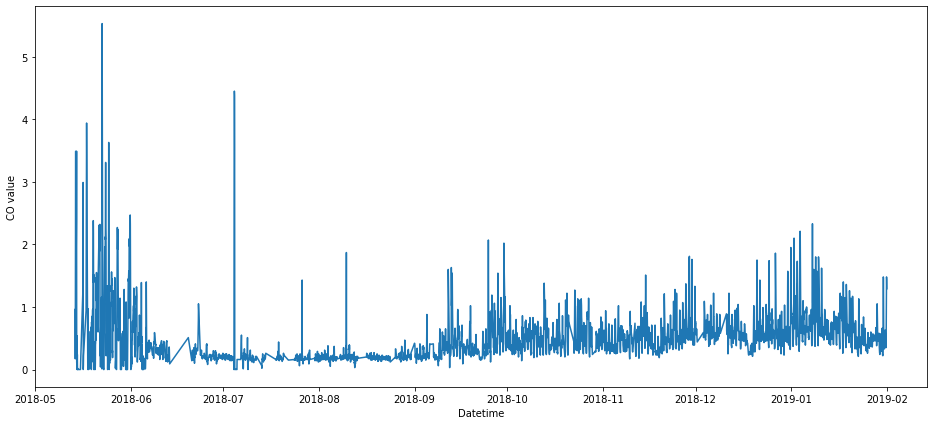

In [24]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Datetime')
ax1.set_ylabel('CO value')
ax1.plot(HCLTechStockData)

In [25]:
rolLmean = HCLTechStockData.rolling(12).mean()
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

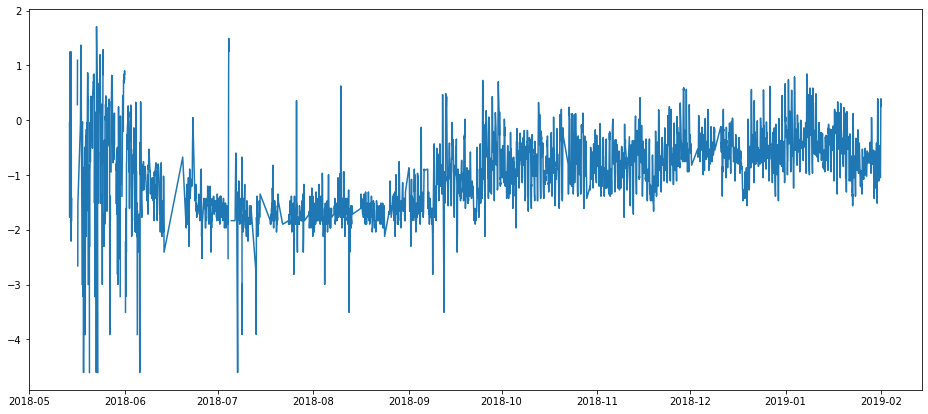

In [26]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

In [27]:
import numpy as np
np.isfinite(HCLTechStockData)


Datetime
2018-05-14 00:00:00    True
2018-05-14 01:00:00    True
2018-05-14 02:00:00    True
2018-05-14 03:00:00    True
2018-05-14 04:00:00    True
                       ... 
2019-01-31 19:00:00    True
2019-01-31 20:00:00    True
2019-01-31 21:00:00    True
2019-01-31 22:00:00    True
2019-01-31 23:00:00    True
Name: CO, Length: 5091, dtype: bool

In [28]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [29]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(TempData['CO'])

def adfuller_test(CO):
    result=adfuller(CO)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    


In [30]:
adfuller_test(TempData['CO'])

ADF Test Statistic : -4.631760641668961
p-value : 0.000112834044936259
#Lags Used : 33
Number of Observations Used : 5057
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [31]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(HCLTechStockData)

def adfuller_test(HCLTechStockData):
    result=adfuller(HCLTechStockData)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    


In [32]:
adfuller_test(HCLTechStockData)

ADF Test Statistic : -4.631760641668961
p-value : 0.000112834044936259
#Lags Used : 33
Number of Observations Used : 5057
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [33]:
HCLTechStockData.sort_index(inplace= True)

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
type(ts_log_diff)

pandas.core.series.Series

In [36]:
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

In [38]:
TempData['CO'].plot()

<AxesSubplot:>

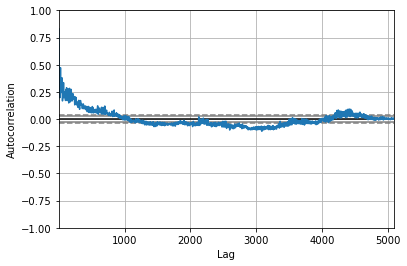

In [39]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(TempData['CO'])
plt.show()

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [41]:
import statsmodels.api as sm

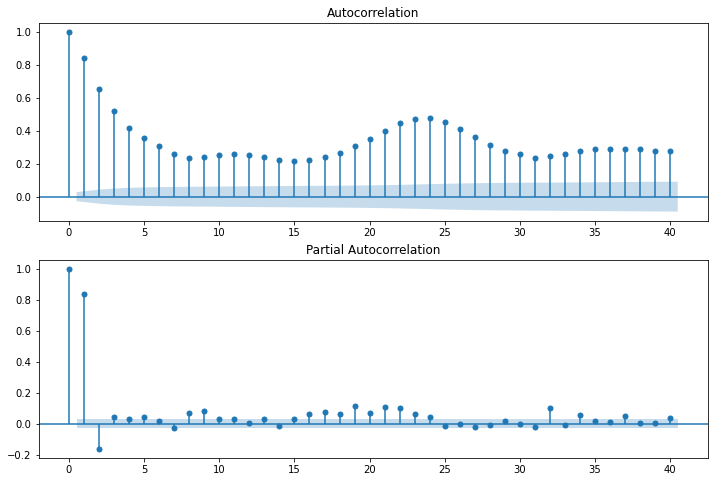

In [42]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(HCLTechStockData.iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(HCLTechStockData.iloc[13:],lags=40,ax=ax2)

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [56]:
model=ARIMA(HCLTechStockData,order=(1,0,1))
result_ARIMA=model.fit()

In [57]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     CO   No. Observations:                 5091
Model:                     ARMA(1, 1)   Log Likelihood                 684.170
Method:                       css-mle   S.D. of innovations              0.212
Date:                Thu, 16 Mar 2023   AIC                          -1360.341
Time:                        21:51:53   BIC                          -1334.200
Sample:                             0   HQIC                         -1351.187
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4758      0.015     30.699      0.000       0.445       0.506
ar.L1.CO       0.7737      0.011     73.488      0.000       0.753       0.794
ma.L1.CO       0.1838      0.016     11.442      0.000       0.152       0.215
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2925           +0.0000j            1.2925            0.0000
MA.1           -5.4403           +0.0000j            5.4403            0.5000
-----------------------------------------------------------------------------
"""

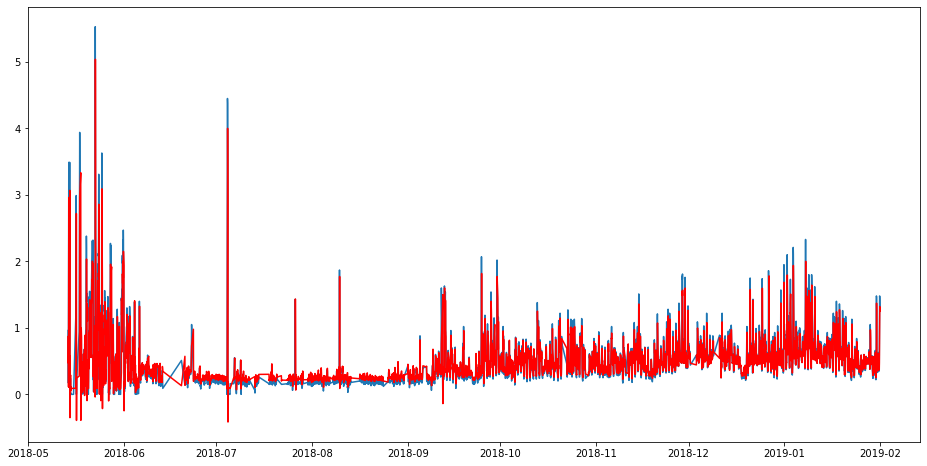

In [55]:
# ARIMA model forecasting

fig = plt.figure(figsize=(16,8))
model=ARIMA(HCLTechStockData,order=(1,0,1))
result_ARIMA=model.fit(disp=-1)
plt.plot(HCLTechStockData)
plt.plot(result_ARIMA.fittedvalues, color='red')
ax.legend(['CO', 'Forecasted CO'])

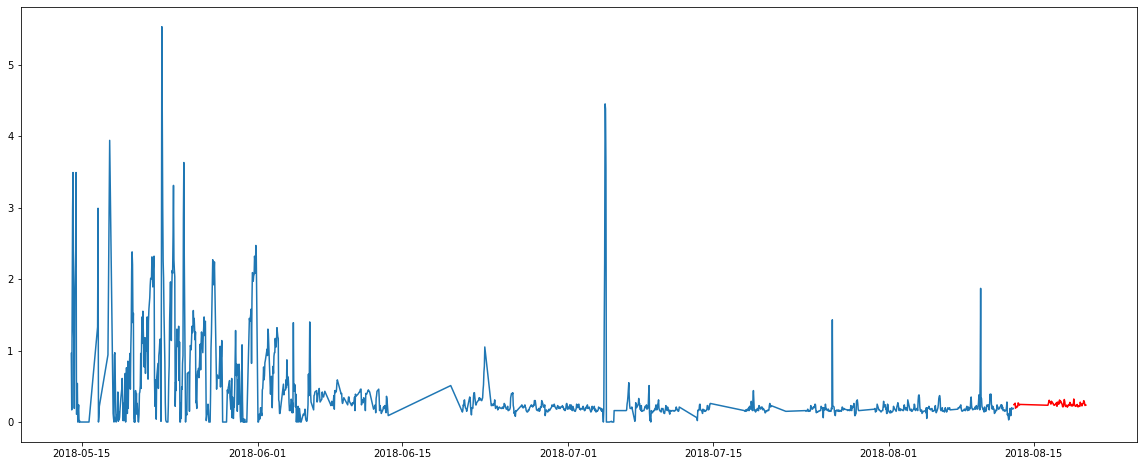

In [58]:
# forecasted model
fig = plt.figure(figsize=(20,8))
num_points = len(HCLTechStockData)
x = result_ARIMA.predict(start=(1476), end=(1578), dynamic=False)

plt.plot(HCLTechStockData[:1476])
plt.plot(x, color='r')
